# GRIP : THE SPARK FOUNDATION
#### DATA SCIENCE AND BUSINESS ANALYTICS - INTERNSHIP

# By SHRUTI PAL

## TASK 3: Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'

In [1]:
#import libaraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#import dataset
sample = pd.read_csv('SampleSuperstore.csv')
sample

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#Printing the shape and summary of data
#Printing the shape and summary of data
print("Shape:",sample.shape)
print("Summary:")
sample.describe()

Shape: (9994, 13)
Summary:


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
#Check for duplicate values
print('No. of duplicated values :', sample.duplicated().sum())

No. of duplicated values : 17


In [6]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Finding relation between different columns

sample.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [8]:
sample.drop_duplicates(inplace = True)
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
sample.shape

(9977, 13)

In [10]:
sample2 = sample.groupby(["Region", "Category"]).sum()
sample2 = sample2.reset_index()
sample2

,Region,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Central,Furniture,31450757,163407.1938,1824,143.04,-2906.1467
1,Central,Office Supplies,92607360,166959.3470,5400,358.20,8864.5899
2,Central,Technology,27465071,170416.3120,1544,55.90,33697.4320
3,East,Furniture,10364437,208009.8320,2212,92.30,3058.2246
4,East,Office Supplies,29762320,205451.3830,6455,244.50,40986.0495
5,East,Technology,9972581,264973.9810,1942,76.70,47462.0351
6,South,Furniture,11471303,117298.6840,1291,40.35,6771.2061
7,South,Office Supplies,34072173,125651.3130,3800,166.60,19986.3928
8,South,Technology,10331576,148771.9080,1118,31.60,19991.8314
9,West,Furniture,64719968,252590.6035,2693,92.90,11498.5297


##### VISUALISATION OF DATA

<AxesSubplot:title={'center':'Total Number of Products Sold in Each Region'}, xlabel='Region', ylabel='Quantity'>

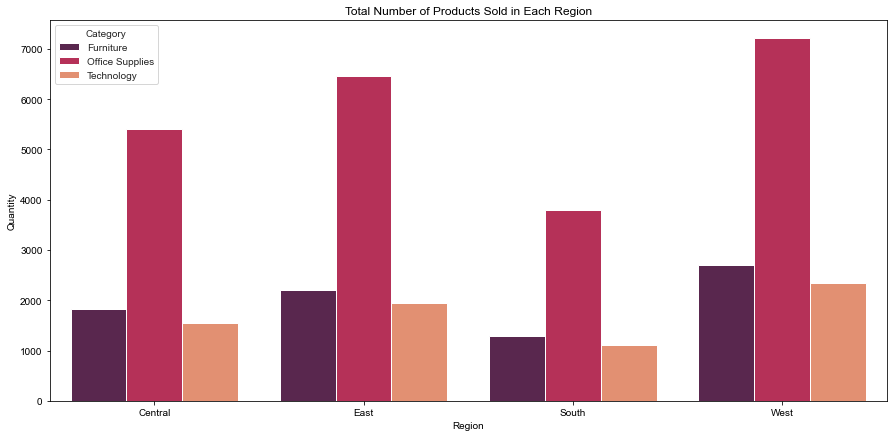

In [11]:
# Ploting the graph for each region v/s Quantity

plt.figure(figsize=(15,7))
plt.title("Total Number of Products Sold in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Quantity', hue= "Category", palette= 'rocket', data = sample2)

<AxesSubplot:title={'center':'Total Sales Made by Products in Each Region'}, xlabel='Region', ylabel='Sales'>

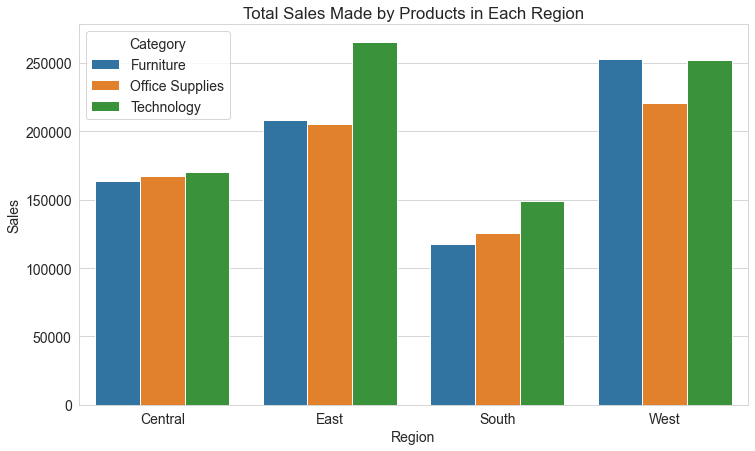

In [12]:
# Ploting the graph for each region v/s sales

plt.rcParams['font.size']= 14
plt.figure(figsize=(12,7))
plt.title("Total Sales Made by Products in Each Region")
sns.set_style("whitegrid")
sns.barplot(x = 'Region', y =  'Sales', hue= "Category", data = sample2)

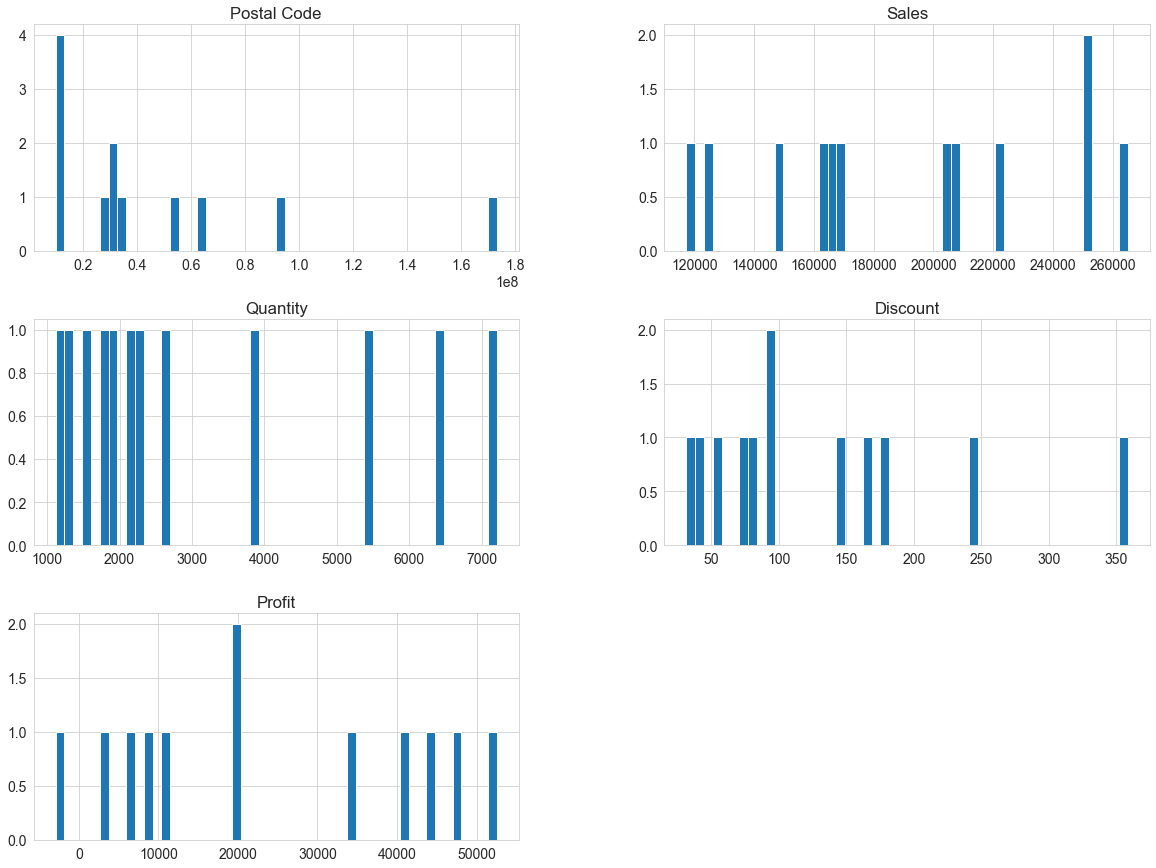

In [13]:
sample2.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
# Now we will make another subset to analyze subcategory items by different parameters.

sample3 = sample[["Sub-Category", "Sales", "Profit","Quantity"]]
sample3 = sample3.groupby(["Sub-Category"]).sum()
sample3 = sample3.sort_values("Quantity", ascending= False)
sample3 = sample3.reset_index()
sample3

,Sub-Category,Sales,Profit,Quantity
0,Binders,203409.1690,30228.0003,5971
1,Paper,78224.1420,33944.2395,5144
2,Furnishings,91683.0240,13052.7230,3560
3,Phones,330007.0540,44515.7306,3289
4,Storage,223843.6080,21278.8264,3158
5,Art,27107.0320,6524.6118,2996
6,Accessories,167380.3180,41936.6357,2976
7,Chairs,327777.7610,26567.1278,2351
8,Appliances,107532.1610,18138.0054,1729
9,Labels,12444.9120,5526.3820,1396


<AxesSubplot:title={'center':'Number of items sold'}, xlabel='Sub-Category', ylabel='Quantity'>

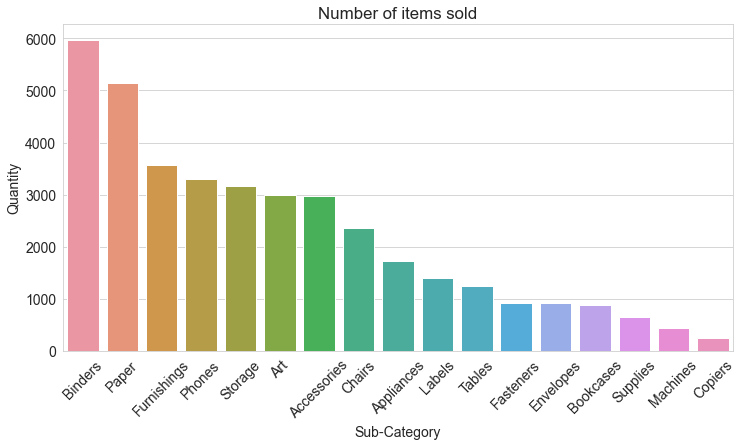

In [15]:
plt.figure(figsize=(12,6))
plt.title("Number of items sold")
plt.xticks(rotation = 45)
sns.barplot(x= "Sub-Category", y= "Quantity", data = sample3)

In [16]:
sample4= sample3[["Sub-Category", "Sales", "Profit"]]
sample4.set_index("Sub-Category", inplace= True)
sample4

,Sales,Profit
Sub-Category,,
Binders,203409.1690,30228.0003
Paper,78224.1420,33944.2395
Furnishings,91683.0240,13052.7230
Phones,330007.0540,44515.7306
Storage,223843.6080,21278.8264
Art,27107.0320,6524.6118
Accessories,167380.3180,41936.6357
Chairs,327777.7610,26567.1278
Appliances,107532.1610,18138.0054


Text(0.5, 1.0, 'Comparison between Sales and Profit of Products')

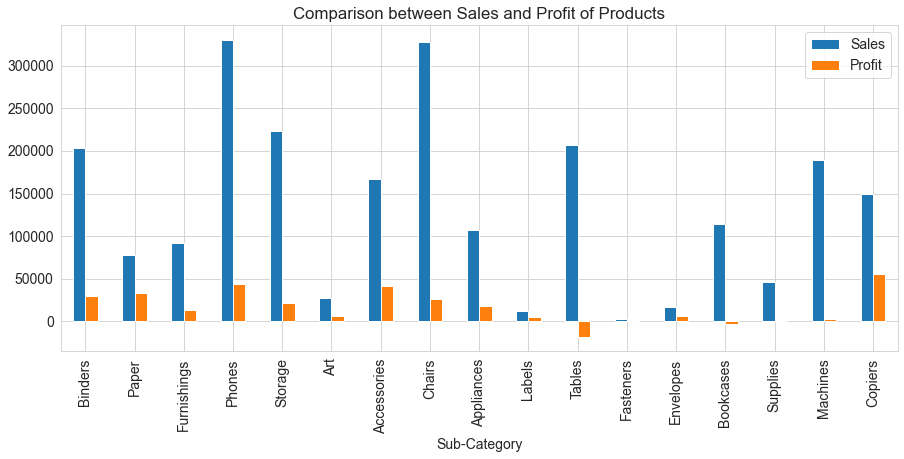

In [17]:
# Ploting the graph to find the relationship between sales and profit.

plt.rcParams['figure.figsize']= (15,6)
sample4.plot(kind='bar')
plt.title("Comparison between Sales and Profit of Products")

In [18]:
# Making another subset to analyze data by state

sample5 = sample[["State", "Sales", "Profit", "Quantity", "Discount"]]
sample5 = sample5.groupby(["State"]).sum()
sample5 = sample5.sort_values("Quantity", ascending= False)
sample5= sample5.reset_index()
sample5.head(15)

,State,Sales,Profit,Quantity,Discount
0,California,457576.2715,76330.7891,7649,145.60
1,New York,310827.1510,74015.4622,4220,62.40
2,Texas,170124.5418,-25750.9833,3718,364.24
3,Pennsylvania,116496.3620,-15565.4035,2150,192.70
4,Washington,138560.8100,33368.2375,1871,32.40
5,Illinois,80162.5370,-12601.6500,1842,191.10
6,Ohio,77976.7640,-16959.3178,1757,152.10
7,Florida,89473.7080,-3399.3017,1379,114.65
8,North Carolina,55603.1640,-7490.9122,983,70.60
9,Michigan,75879.6440,24428.0903,943,1.80


Text(0, 0.5, 'Number of products sold')

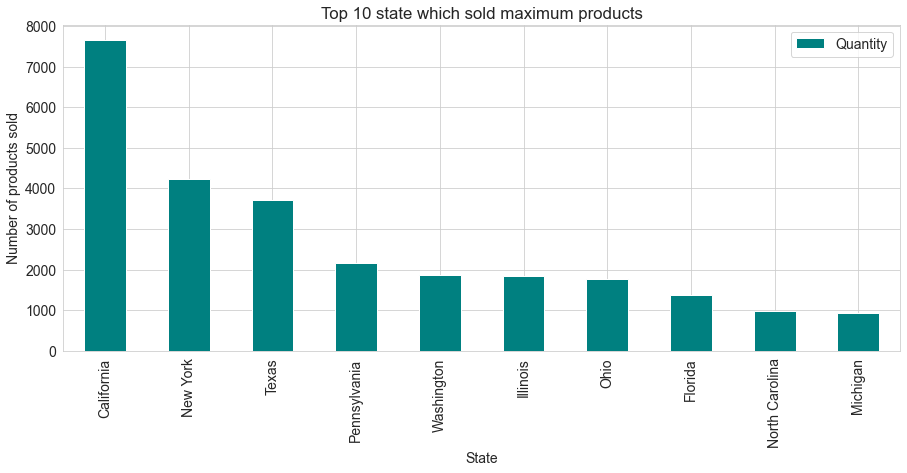

In [19]:
# Ploting the graph for top 10 state which sold maximum products.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
sample5.head(10).plot(kind='bar', x= "State", y= "Quantity", color= 'teal')
plt.title("Top 10 state which sold maximum products")
plt.ylabel("Number of products sold")

In [20]:
sample6= sample5[["State", "Sales", "Profit"]]
sample6.set_index("State", inplace= True)
sample6

,Sales,Profit
State,,
California,457576.2715,76330.7891
New York,310827.1510,74015.4622
Texas,170124.5418,-25750.9833
Pennsylvania,116496.3620,-15565.4035
Washington,138560.8100,33368.2375
Illinois,80162.5370,-12601.6500
Ohio,77976.7640,-16959.3178
Florida,89473.7080,-3399.3017
North Carolina,55603.1640,-7490.9122


Text(0.5, 1.0, 'Comparison between Sales and Profit of Products in top 10 state')

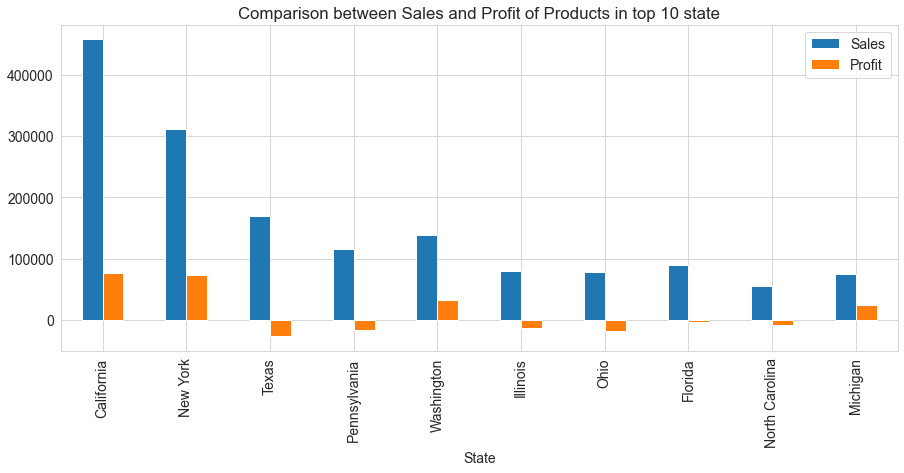

In [21]:
# Ploting the graph for each state to know how much profit they made in comparison to sale.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (15,6)
sample6.head(10).plot(kind='bar')
plt.title("Comparison between Sales and Profit of Products in top 10 state")

Text(0, 0.5, 'Discount')

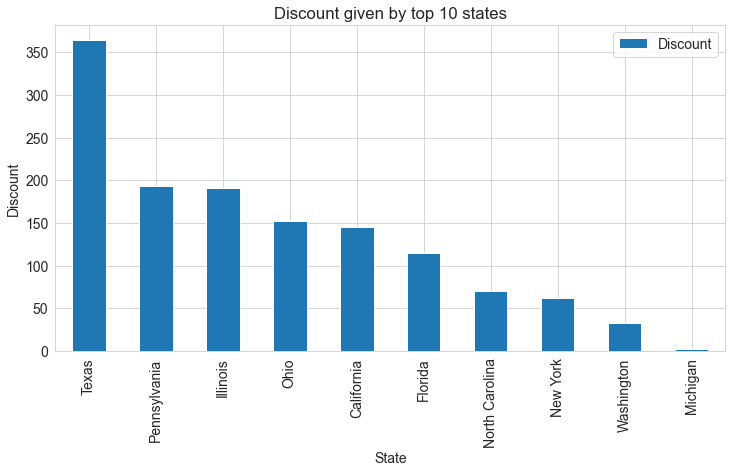

In [22]:
# Ploting the graph for maximum discount given by top 10 states.

plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (12,6)
sample5.head(10).sort_values("Discount", ascending = False).plot(kind='bar', x= "State", y= "Discount")
plt.title("Discount given by top 10 states")
plt.ylabel("Discount")

###### SCATTER PLOT FOR THE DATASET

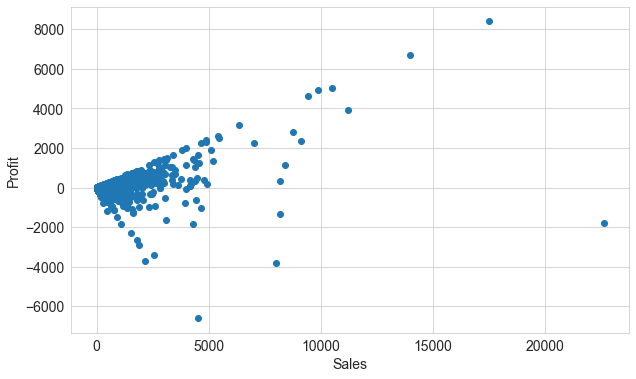

In [23]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(sample["Sales"] , sample["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

###### DISTRIBUTION PLOT FOR THE DATASET

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Sales', ylabel='Density'>

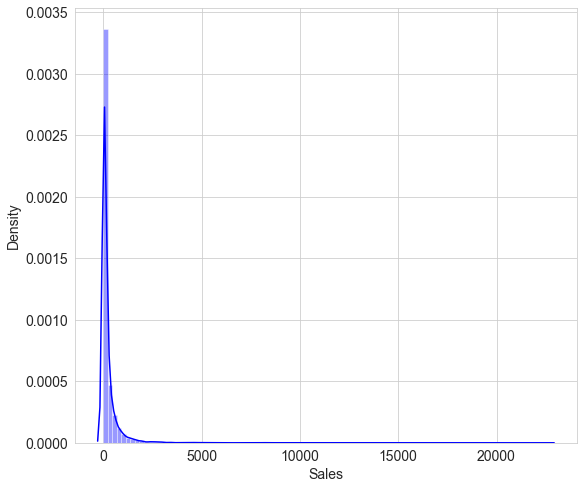

In [24]:
print(sample['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(sample['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4})

### Conclusion :

###### 1.Office supllies were sold in maximum quantity in each region of United States specifically Binders and Papers.

###### 2.Maximum Sales was produced by Technical Products in every region.

###### 3.California is the Top state which made maximum sale but it's profit is approximately same as New york.

###### 4.The states which made loss should decrease their discount amount.

###### 5.Technology and offfice supplies are two popular domain so we can focus more on selling these products.

## Thank you !😊